In [6]:
import numpy as np
import pandas as pd
import os
import calendar
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import xgboost as xgb
from util import stack_all_wells
from sklearn.model_selection import train_test_split
from scipy.stats import linregress, zscore

%matplotlib inline

plt.rc('font', family='serif')
limit = 5
z_score_limit = 4

In [2]:
WELL_DATA_PATH_MODIFIED = os.getcwd() + '/data/well-time-series-modified/'

all_wells = stack_all_wells(path = WELL_DATA_PATH_MODIFIED,
                            resampling = None,
                            dropna = False)


appended 412522100121201_11740_lat_41.42277778_lon_-100.2033778_2019-08-08_224716_modified.csv
appended 414643100313101_11740_lat_41.7785861_lon_-100.5251611_2019-08-08_224925_modified.csv
appended 405738099504501_11741_lat_40.96063889_lon_-99.8457778_2019-08-08_224507_modified.csv
appended 402912096231601_11742_lat_40.4866662_lon_-96.3880693_2019-08-08_224024_modified.csv
appended 405737101423201_11740_lat_40.95999535_lon_-101.7085057_2019-08-08_224500_modified.csv
appended 420006102561201_11739_lat_42.00194444_lon_-102.9561111_2019-08-08_225029_modified.csv
appended 404743096401001_11742_lat_40.7952789_lon_-96.6697378_2019-08-08_224248_modified.csv
appended 413130100531202_11740_lat_41.52505556_lon_-100.8883889_2019-08-08_224744_modified.csv
appended 405118099514901_11741_lat_40.8550833_lon_-99.8635833_2019-08-08_224336_modified.csv
appended 403954099152101_11741_lat_40.66491667_lon_-99.2558944_2019-08-08_224137_modified.csv
appended 404804096403301_11742_lat_40.80105556_lon_-96.6762

appended 403356097275602_11742_lat_40.56556147_lon_-97.4658824_2019-08-08_224104_modified.csv
appended 413156098591201_11741_lat_41.53223249_lon_-98.9870332_2019-08-08_224750_modified.csv
appended 415108099493401_11741_lat_41.8525017_lon_-99.8273468_2019-08-08_224945_modified.csv
appended 404836097584101_11742_lat_40.81001158_lon_-97.9783863_2019-08-08_224311_modified.csv
appended 414952100060301_11740_lat_41.83110278_lon_-100.1008667_2019-08-08_224931_modified.csv
appended 401735098522701_11741_lat_40.29306924_lon_-98.8745226_2019-08-08_223949_modified.csv
appended 404757096405001_11742_lat_40.79916789_lon_-96.6808492_2019-08-08_224259_modified.csv
appended 410943097575001_11742_lat_41.16177778_lon_-97.9639028_2019-08-08_224559_modified.csv
appended 411736096170201_11742_lat_41.2932222_lon_-96.28375_2019-08-08_224631_modified.csv
appended 420757104024701_11918_lat_42.1322333_lon_-104.0467917_2019-08-08_225114_modified.csv
appended 403516101560601_11740_lat_40.58777385_lon_-101.9354582

In [3]:
# after March, before October
all_wells = all_wells[(all_wells['yday']>90) & (all_wells['yday']<270)]

# interpolate corn prices
all_wells['price_corn'] = all_wells['price_corn'].interpolate(method='from_derivatives',
                                                              limit_direction='both', limit=5)

all_wells['deltaT'] = all_wells['tmax (deg c)'] - all_wells['tmin (deg c)']

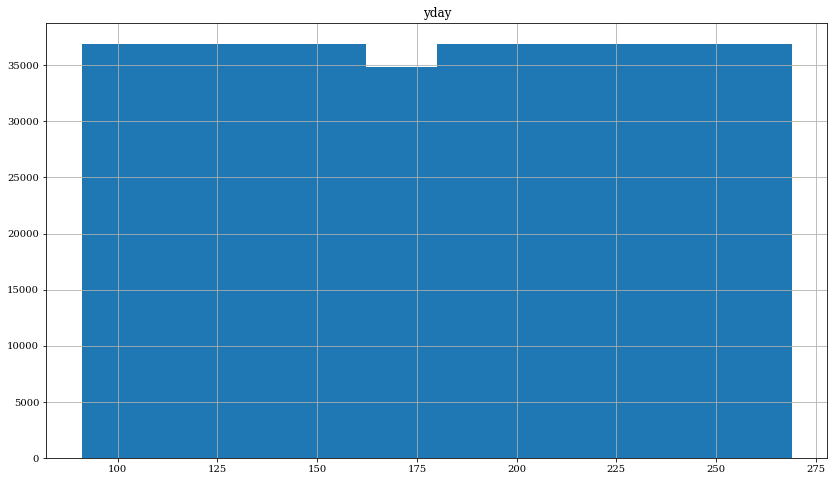

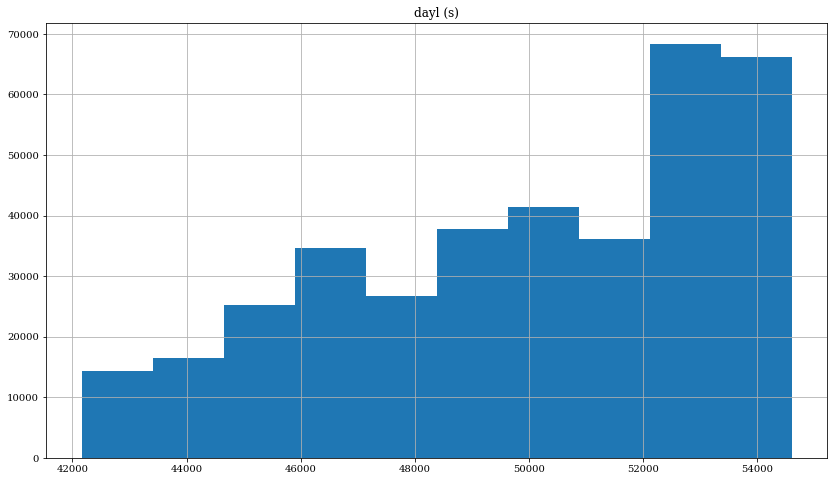

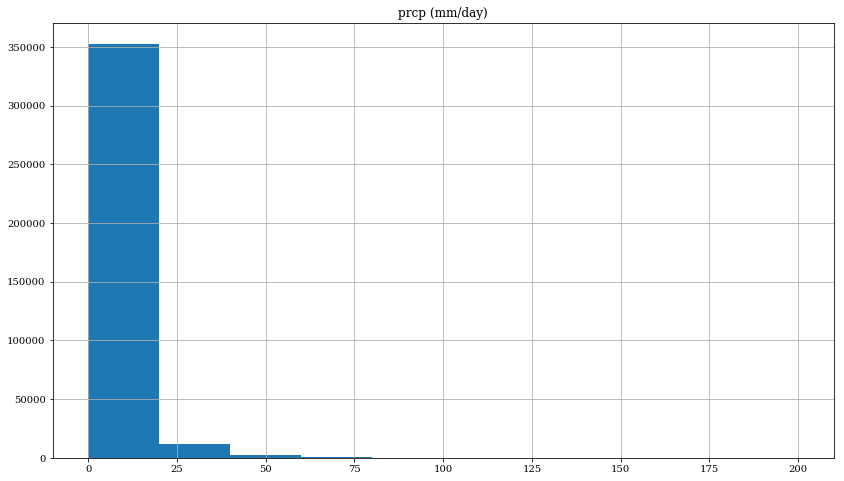

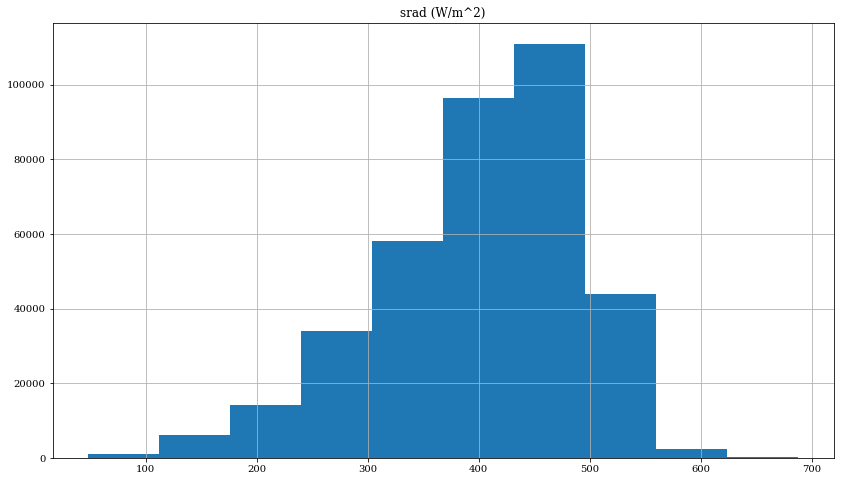

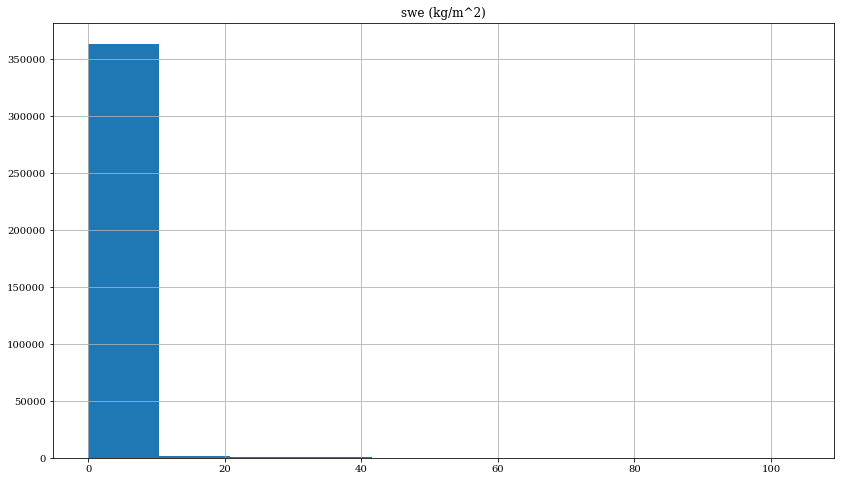

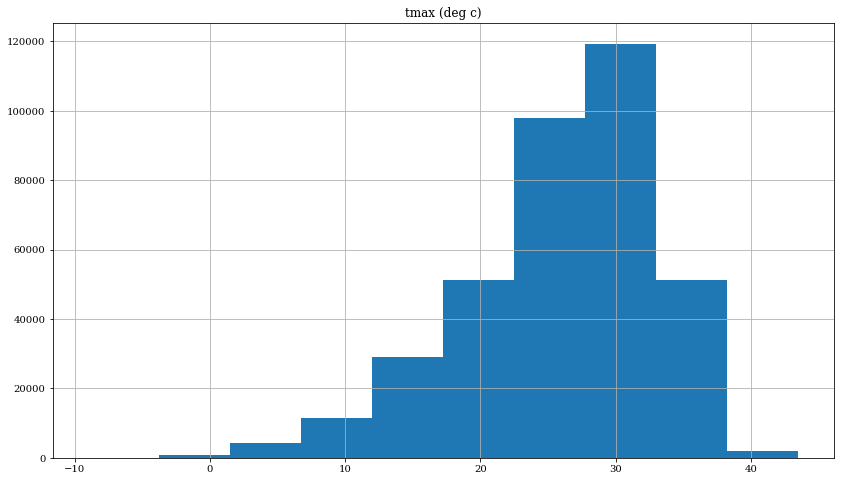

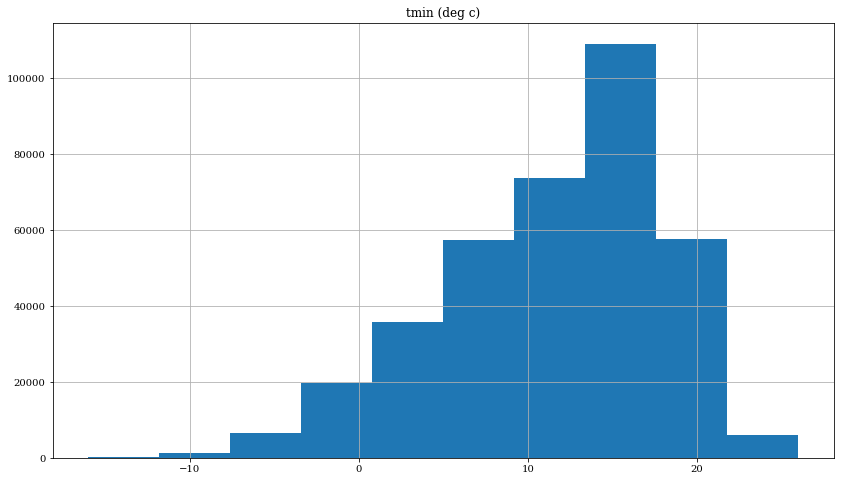

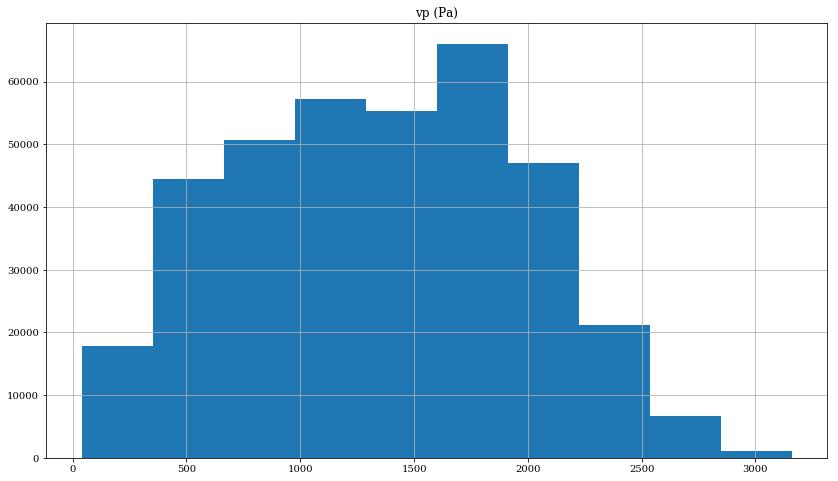

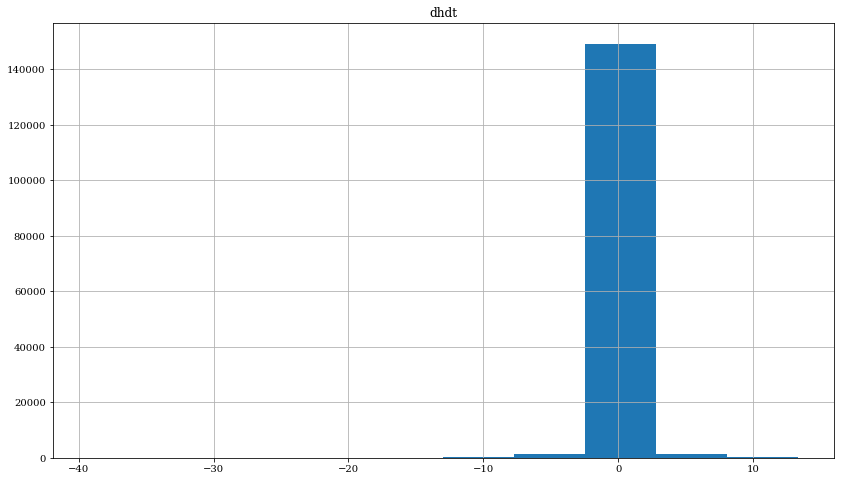

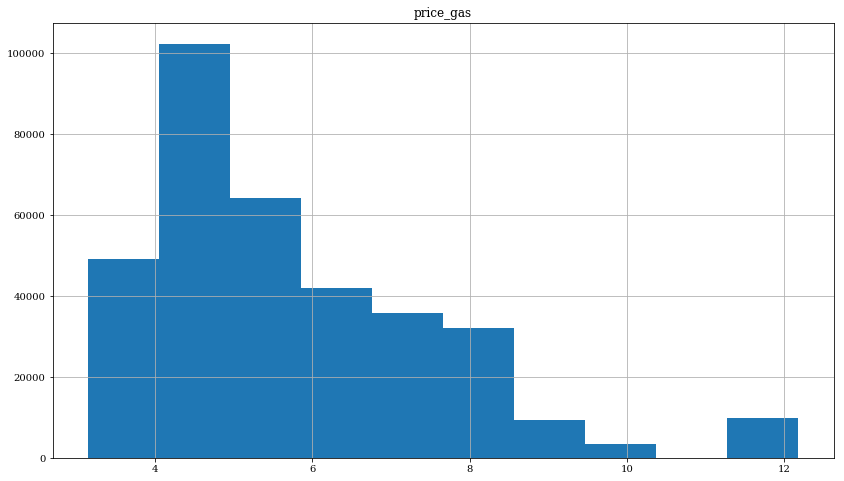

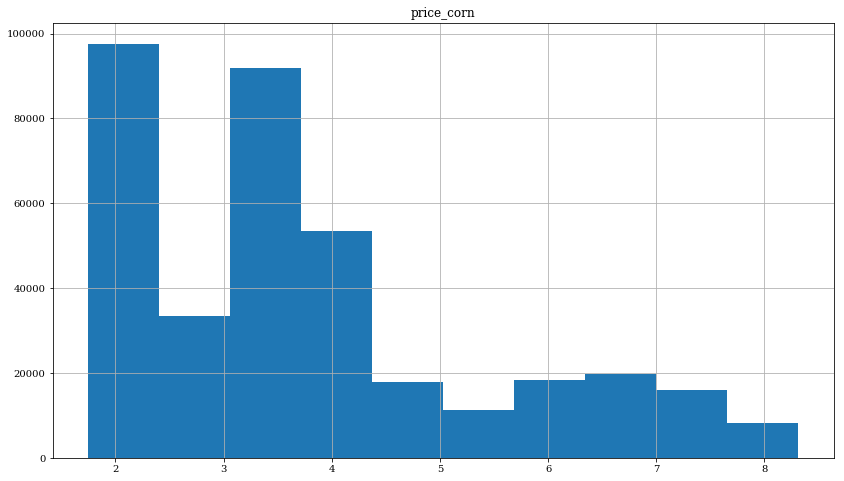

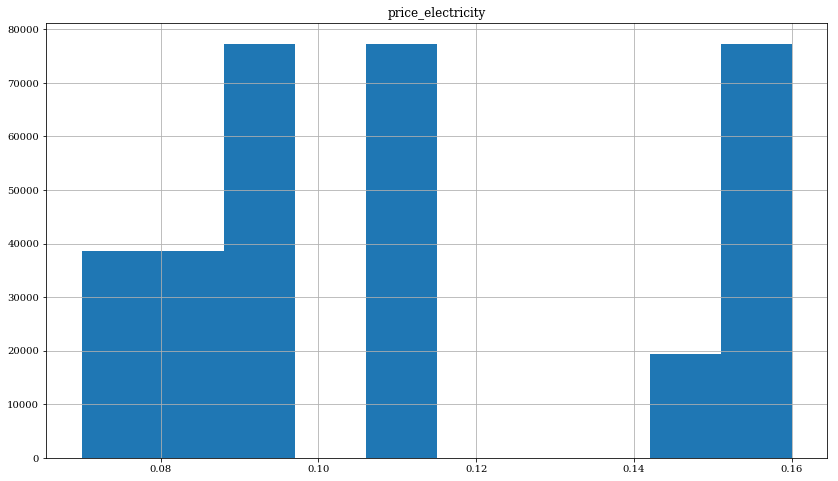

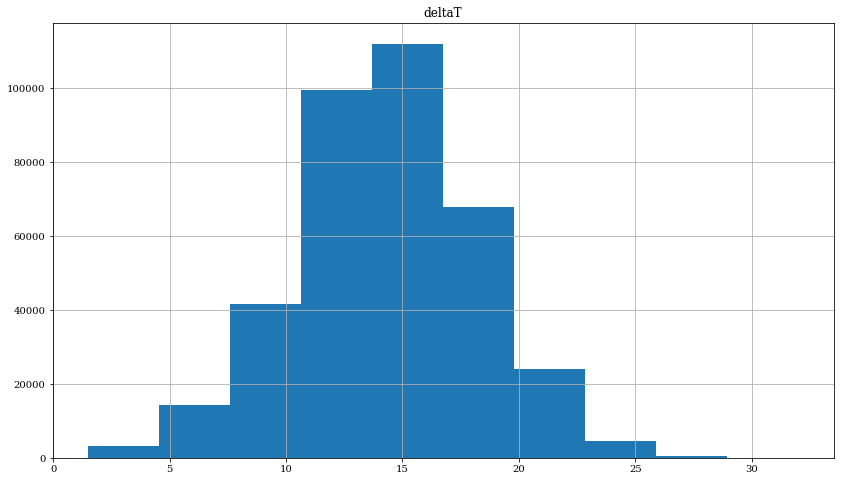

In [13]:
for key in all_wells.keys():
    figure = plt.figure(figsize=(14, 8))
    plt.hist(all_wells[key])
    plt.title(key)
    plt.grid()
    plt.show()
    

In [23]:
all_wells['dhdt_cm'] = pd.cut(x=all_wells['dhdt'].dropna(), bins=np.linspace(-5,5,201))

In [24]:
all_wells['dhdt'].head(150)

90    NaN
91    NaN
92    NaN
93    NaN
94    NaN
95    NaN
96    NaN
97    NaN
98    NaN
99    NaN
100   NaN
101   NaN
102   NaN
103   NaN
104   NaN
105   NaN
106   NaN
107   NaN
108   NaN
109   NaN
110   NaN
111   NaN
112   NaN
113   NaN
114   NaN
115   NaN
116   NaN
117   NaN
118   NaN
119   NaN
       ..
210   NaN
211   NaN
212   NaN
213   NaN
214   NaN
215   NaN
216   NaN
217   NaN
218   NaN
219   NaN
220   NaN
221   NaN
222   NaN
223   NaN
224   NaN
225   NaN
226   NaN
227   NaN
228   NaN
229   NaN
230   NaN
231   NaN
232   NaN
233   NaN
234   NaN
235   NaN
236   NaN
237   NaN
238   NaN
239   NaN
Name: dhdt, Length: 150, dtype: float64